<a href="https://colab.research.google.com/github/celsosoaresss/ML/blob/main/Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import seaborn as sns

In [ ]:
#carregar os dados
df = pd.read_csv('/content/cancer_prostata.csv')
df.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [ ]:
#apagar coluna ID
df.drop('id', axis = 1, inplace = True)
df.head(10)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,B,25,25,83,477,0.128,0.170,0.209,0.076
6,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,M,15,18,90,578,0.119,0.165,0.220,0.075
8,M,19,24,88,520,0.127,0.193,0.235,0.074
9,M,25,11,84,476,0.119,0.240,0.203,0.082


In [ ]:
#transformando os valores das colunas em dados numéricos
classification = {'B' : 0, 'M': 1}
df['diagnosis_result'] = df['diagnosis_result'].map(classification)
df.head(10)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059
5,0,25,25,83,477,0.128,0.170,0.209,0.076
6,1,16,26,120,1040,0.095,0.109,0.179,0.057
7,1,15,18,90,578,0.119,0.165,0.220,0.075
8,1,19,24,88,520,0.127,0.193,0.235,0.074
9,1,25,11,84,476,0.119,0.240,0.203,0.082


In [ ]:
#separar X e y
X = df.drop('diagnosis_result', axis = 1) #todas as colunas menos a "diagnosis_result"
y = df.diagnosis_result.values #ou df['diagnosis_result'].values

print(X.shape, y.shape)

(100, 8) (100,)


In [ ]:
#separando a base de treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 8) (20, 8) (80,) (20,)


In [ ]:
model = LogisticRegression()

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
#imprimindo os resultados obtidos
def print_metrics(y_true, y_pred):
  vn, fp, fn, vp = mt.confusion_matrix(y_true, y_pred).ravel()

  acc = float(vp + vn)/float(vn + fp + fn + vp)
  rec = float(vp)/float(vp + fn)
  spec = float(vn)/float(vn + fp)

  return acc, rec, spec

acc, rec, spec = print_metrics(y_test, y_pred)

print(acc, rec, spec) #especificidade == está mandando muitas pessoas para a biopsia

0.75 0.875 0.25


<Axes: >

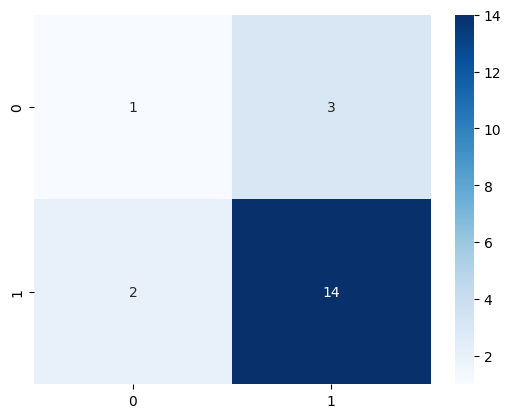

In [ ]:
cm = confusion_matrix(y_test, y_pred,)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors= 3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc, rec, spec = print_metrics(y_test, y_pred)

print (acc, rec, spec)

0.75 0.8125 0.5


<Axes: >

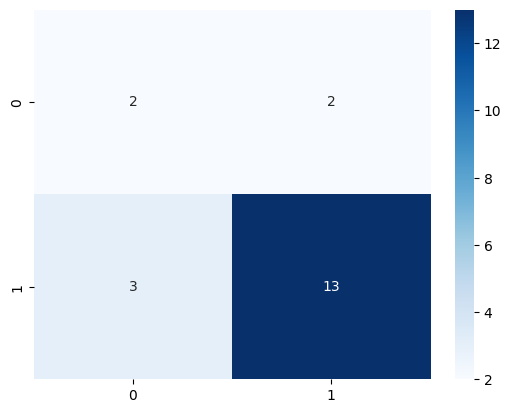

In [ ]:
cm = confusion_matrix(y_test, y_pred,)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# **SVM**

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc, rec, spec = print_metrics(y_test, y_pred)

print (acc, rec, spec)

0.75 0.8125 0.5


<Axes: >

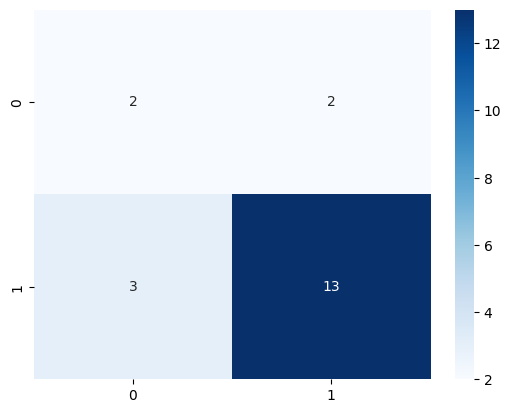

In [ ]:
cm = confusion_matrix(y_test, y_pred,)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc, rec, spec = print_metrics(y_test, y_pred)

print (acc, rec, spec)

0.65 0.75 0.25


<Axes: >

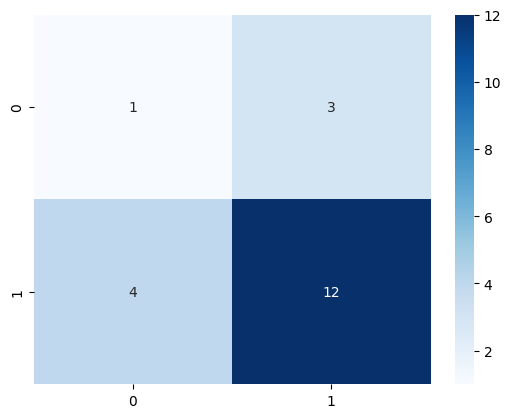

In [ ]:
cm = confusion_matrix(y_test, y_pred,)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter = 1500) #max_iter = 1500 maximo de interações
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc, rec, spec = print_metrics(y_test, y_pred)

print(acc, rec, spec)

0.8 0.9375 0.25


<Axes: >

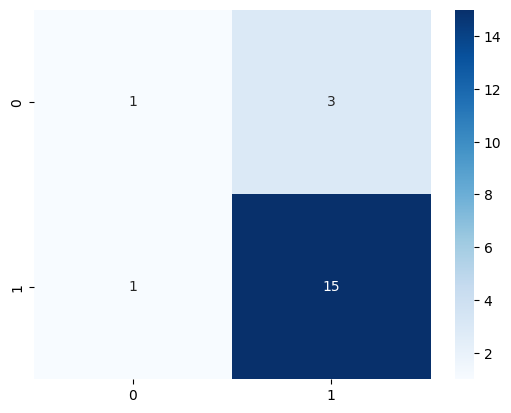

In [ ]:
cm = confusion_matrix(y_test, y_pred,)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")